In [1]:
import bioframe
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt

# Importing ChIP-seq Peaks for CTCF-AID cells after 2 days of auxin and wildtype after 2 days of auxin treatment

In [2]:
sdir = '/scratch/pokorny/Elphege_2017/'
CTCF_ChIP_seq_CTCF_AID_auxin2days_rep1 = sdir+'GSM2609186_CTCF_ChIP-seq_CTCF-AID_auxin2days_rep1_ENC125_Peaks.bed'
CTCF_ChIP_exo_WT_untagged_auxin2days_rep1 = sdir+'GSM2609196_CTCF_ChIP-exo_WT-untagged_auxin2days_rep1_ENC2_Peaks.bed'

# Read the files into tables
ctcf_auxin2days = bioframe.read_table(CTCF_ChIP_seq_CTCF_AID_auxin2days_rep1, schema='bed')
wt_auxin2days = bioframe.read_table(CTCF_ChIP_exo_WT_untagged_auxin2days_rep1, schema='bed')

In [3]:
ctcf_auxin2days[0:5]

,chrom,start,end,name,score,strand
0,chr1,4322655,4322855,NaN,NaN,NaN
1,chr1,4336363,4336563,NaN,NaN,NaN
2,chr1,4758529,4758729,NaN,NaN,NaN
3,chr1,4760048,4760248,NaN,NaN,NaN
4,chr1,6408056,6408256,NaN,NaN,NaN


In [4]:
wt_auxin2days[0:5]

,chrom,start,end,name,score,strand
0,chr1,3002702,3002902,NaN,NaN,NaN
1,chr1,3053590,3053790,NaN,NaN,NaN
2,chr1,3107612,3107812,NaN,NaN,NaN
3,chr1,3278540,3278740,NaN,NaN,NaN
4,chr1,3315378,3315578,NaN,NaN,NaN


## Creating summary of the ChIP-seq Peak files

Counting number of chromosomes represented, how many peaks in each chromosome, genomic intervals between each
Basically, finding here is just that we lost a lot of CTCF-bound to the genome after auxin-induced degradation of CTCF (makes sense). 
- Could be interesting to use the overlapping intervals (i.e. sites where CTCF still hung on after degradation) and see if these correlate to anything. I predict that they will correlate to strong motifs. The subset of genes regulated by these CTCF binding regions should have similar expression levels in either WT or dCTCF

- The strength of these peaks (derived by number sequencing reads) may also be an interesting 

In [5]:
# counting unique values for chromosome column
print("Number of chromosomes represented by data: " + str(pd.unique(ctcf_auxin2days['chrom']).size))

print("Chromosomes: ")
print(*pd.unique(ctcf_auxin2days['chrom']))

Number of chromosomes represented by data: 20
Chromosomes: 
chr1 chr2 chr3 chr4 chr5 chr6 chr7 chr8 chr9 chrX chr10 chr11 chr12 chr13 chr14 chr15 chr16 chr17 chr18 chr19


<function matplotlib.pyplot.show(close=None, block=None)>

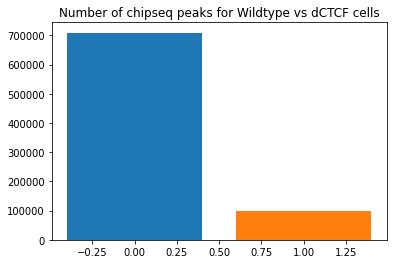

In [6]:
# Compare number of peaks
num_ctcf_auxin_chipseq_peaks = ctcf_auxin2days.size
num_wt_chipseq_peaks = wt_auxin2days.size

plt.bar(0, num_wt_chipseq_peaks, width=0.8)
plt.bar(1, num_ctcf_auxin_chipseq_peaks, width=0.8)
plt.title('Number of chipseq peaks for Wildtype vs dCTCF cells')

plt.show

In [7]:
overlap = bioframe.overlap(ctcf_auxin2days,wt_auxin2days, suffixes=('_ctcf','_wt'))

In [8]:
wt_exclusive = bioframe.subtract(wt_auxin2days, ctcf_auxin2days)

ctcf_exclusive = bioframe.subtract(ctcf_auxin2days, wt_auxin2days)

Number of regions bound by CTCF: 19876
Number of regions in WT only: 117797
Number of regions in -CTCF only: 13977


<function matplotlib.pyplot.show(close=None, block=None)>

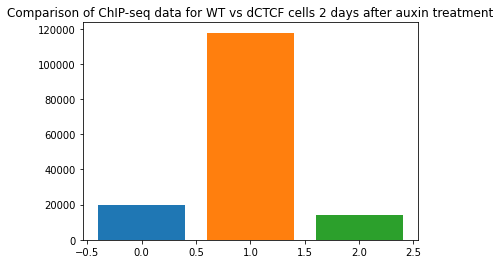

In [9]:
print('Number of regions bound by CTCF: {}'.format(len(overlap)))
print('Number of regions in WT only: {}'.format(len(wt_exclusive)))
print('Number of regions in -CTCF only: {}'.format(len(ctcf_exclusive)))

plt.bar(0, len(overlap), width=0.8)
plt.bar(1, len(wt_exclusive), width=0.8)
plt.bar(2, len(ctcf_exclusive), width=0.8)
plt.title('Comparison of ChIP-seq data for WT vs dCTCF cells 2 days after auxin treatment')

plt.show

# Importing RNA-seq data for CTCF-AID cells prior to auxin treatments and after 2 days of auxin treatment

## Download Supplementary Table3 RNA-seq FPKM values, Related to figure 6 
FPKM = 'Fragments Per Kilobase of transcript per Million' mapped reads. In RNA-Seq, the relative expression of a transcript is proportional to the number of cDNA fragments that originate from it.

Can use this data as a measurement of transcription levels for a gene.
Note: tried to import one of the bigwig files directly and crashed the jupyter kernel, so might have to process that richer data in the shell env.

Notes from data processing description: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM2609209 

"Genes with an FPKM below 1.1 in all conditions were not considered in the differential expression analysis" 

In [10]:
#Download Supplementary Table3 RNA-seq FPKM values, Related to figure 6 
RNA_seq_FPKM = pd.read_excel('/scratch/pokorny/Elphege_2017/sup_data/NIHMS873912-supplement-10.xlsx', skiprows=6, usecols="A:G, O:Q")

In [11]:
RNA_seq_FPKM = RNA_seq_FPKM.rename(columns={'untreated': 'CTCF-AID_untreated', '1day': 'CTCF-AID_1day', '2days': 'CTCF-AID_2days', '4days': 'CTCF-AID_4days',
                                '2days_washoff_2days' : 'CTCF-AID_washoff', 'untreated.1' : 'WT_untreated', '2days.3' : 'WT_2days', '4days.3' : 'WT_4days'})


RNA_seq_FPKM[0:5]

,tracking_id,locus,CTCF-AID_untreated,CTCF-AID_1day,CTCF-AID_2days,CTCF-AID_4days,CTCF-AID_washoff,WT_untreated,WT_2days,WT_4days
0,0610005C13Rik,chr7:52823164-52845080,0.784511,0.804255,1.040841,2.176798,1.209881,0.531110,0.539697,0.414068
1,0610007P14Rik,chr12:87156404-87165495,71.716133,74.856200,63.412767,59.250033,67.995733,57.020867,49.716167,57.023633
2,0610009B22Rik,chr11:51498886-51502136,69.529333,76.436433,61.336067,38.937500,58.353700,58.497000,46.990267,58.072767
3,0610009L18Rik,chr11:120209991-120212504,0.944842,1.154941,0.905838,1.097459,0.889548,1.180704,1.977405,0.825640
4,0610009O20Rik,chr18:38398058-38422283,17.565900,20.652933,20.476800,20.633733,18.857300,18.864133,18.413433,18.779333


In [12]:
# Split the string-format of locus into a list of values that follow bedframe format: [chrom, start, end]
def parseLocus(locus):
    
    chrom = locus.split(':')[0]
    bedframe_indices = locus.split(':')[1].split('-')
    bedframe_indices = [int(i) for i in bedframe_indices]
    bedframe_indices.insert(0, chrom)
    return bedframe_indices

def reverseParseLocus(chrom, start, end):
    
    
    return str(chrom)+":"+str(start)+"-"+str(end)


# # little test
# sample_locus = 'chr2:174952492-175261278'
# bedframe_list = parseLocus(sample_locus)
# print(bedframe_list)

# backToLocus = reverseParseLocus(bedframe_list[0], bedframe_list[1], bedframe_list[2])
# print(backToLocus)

In [13]:
# Group FPKM data according to change in expression from untreated to 2days of auxin treatment
twoDay_RNAseq_change = RNA_seq_FPKM.filter(['tracking_id', 'locus', 'CTCF-AID_untreated', 'CTCF-AID_2days'], axis=1)
twoDay_RNAseq_change['delta'] = twoDay_RNAseq_change.apply(lambda row: row['CTCF-AID_2days'] / row['CTCF-AID_untreated'], axis=1)

# Sort by FPKM
twoDay_RNAseq_change = twoDay_RNAseq_change.sort_values(by='delta', ascending=False)

twoDay_RNAseq_change[['chrom', 'start', 'end']] = twoDay_RNAseq_change.apply(lambda row: parseLocus(row['locus']), axis=1, result_type='expand')

twoDay_RNAseq_change[0:5]

,tracking_id,locus,CTCF-AID_untreated,CTCF-AID_2days,delta,chrom,start,end
20329,Snord42b,chr11:77994436-77997086,0.01,3259.146667,325914.666667,chr11,77994436,77997086
13339,Mir6900,chr1:94336295-94370335,0.01,1716.360000,171636.000000,chr1,94336295,94370335
20335,Snord49b,chr11:62416378-62418308,0.01,949.356667,94935.666667,chr11,62416378,62418308
13524,Mir7067,chr8:73418620-73421342,0.01,904.956667,90495.666667,chr8,73418620,73421342
20327,Snord38a,chr4:116826440-116828737,0.01,801.040000,80104.000000,chr4,116826440,116828737


In [14]:
# With RNA_seq data ordered by high RNA_seq_change to low, extract just the locus as an ordered bedframe.


# Extract locus column to save as a bedframe
## note: the indices of this should be the same as RNA_seq_FPKM, so after mapping should be able to extract the FPKM values from there (hopefully)
RNA_seq_bf = twoDay_RNAseq_change[['chrom', 'start', 'end']]
RNA_seq_bf[0:5]

,chrom,start,end
20329,chr11,77994436,77997086
13339,chr1,94336295,94370335
20335,chr11,62416378,62418308
13524,chr8,73418620,73421342
20327,chr4,116826440,116828737


# Visualizing relationship between differentially expressed genes and CTCF binding to the Transcription Start Site

## Downloading RefSeq transcripts and extracting TSS for mm9

In [15]:
# Adding header from GTF filetype description: https://genome.ucsc.edu/FAQ/FAQformat.html#format4 
refGenes = pd.read_table('/scratch/pokorny/genomic_annotations/mm9.refGene.gtf', header=None, 
                         names=['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame',
                                'attributes'])

In [16]:
np.unique( refGenes['seqname'] )

array(['chr1', 'chr10', 'chr11', 'chr12', 'chr13', 'chr13_random',
       'chr14', 'chr15', 'chr16', 'chr17', 'chr17_random', 'chr18',
       'chr19', 'chr1_random', 'chr2', 'chr3', 'chr4', 'chr4_random',
       'chr5', 'chr5_random', 'chr6', 'chr7', 'chr7_random', 'chr8',
       'chr8_random', 'chr9', 'chr9_random', 'chrUn_random', 'chrX',
       'chrX_random', 'chrY', 'chrY_random'], dtype=object)

In [17]:
refTranscripts = refGenes.loc[refGenes['feature'] == 'transcript'].copy()

refTranscripts['TSS_loc'] = np.where((refTranscripts['strand'] == '+'), refTranscripts['start'], refTranscripts['end'])

def parseGeneID(att):
    atts = att.split('"')
    for ix, string in enumerate(atts):
        if 'gene_id' in string:
            return atts[ix+1].split()
        
# little parseGeneIDTest


# Add a gene_id column (eventually, a parser for all the attributes might be nice)
refTranscripts['gene_id'] = refTranscripts.apply(lambda row: parseGeneID(row['attributes']), axis=1, result_type='expand')

refTranscripts[0:5]

,seqname,source,feature,start,end,score,strand,frame,attributes,TSS_loc,gene_id
0,chr15,refGene,transcript,76909420,77137483,.,-,.,"gene_id ""Rbfox2""; transcript_id ""NM_001110827""...",77137483,Rbfox2
33,chr2,refGene,transcript,104266639,104334646,.,-,.,"gene_id ""Hipk3""; transcript_id ""NM_001145824"";...",104334646,Hipk3
70,chr2,refGene,transcript,11393058,11423717,.,-,.,"gene_id ""Pfkfb3""; transcript_id ""NM_001177756""...",11423717,Pfkfb3
109,chr2,refGene,transcript,57090089,57223130,.,+,.,"gene_id ""Gpd2""; transcript_id ""NM_001145820""; ...",57090089,Gpd2
148,chr6,refGene,transcript,135317511,135333191,.,+,.,"gene_id ""Emp1""; transcript_id ""NM_001288627""; ...",135317511,Emp1


In [77]:
# Creating a bioframe from refSeq TSSs
refTSSbioframe = refTranscripts[['seqname', 'TSS_loc']]
refTSSbioframe['end']=refTranscripts['TSS_loc'].copy()
refTSSbioframe.columns=['chrom', 'start', 'end']

print('TSS bf size before clean up:')
print(refTSSbioframe.size)

# Little clean-up
def randomChrom(chr):
    if '_' in chr:
        return chr.split('_')[0]
    else:
        return chr
    
    
refTSSbioframe= refTSSbioframe.loc[False==( refTSSbioframe['chrom'].str.contains('_random'))]

# # test
# fixed = randomChrom('chr1_random')
# print(fixed)

# refTSSbioframe['chrom'] = refTSSbioframe['chrom'].apply(randomChrom)

# refTSSbioframe = bioframe.from_any(refTSSbioframe)

# print('TSS bf size after clean up:')
# print(refTSSbioframe.size)

print(refTSSbioframe.size)

TSS bf size before clean up:
132924
131931


/tmp/SLURM_2434005/ipykernel_20159/2301988269.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  refTSSbioframe['end']=refTranscripts['TSS_loc'].copy()


In [78]:
np.unique(refTSSbioframe['chrom'])

array(['chr1', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15',
       'chr16', 'chr17', 'chr18', 'chr19', 'chr2', 'chr3', 'chr4', 'chr5',
       'chr6', 'chr7', 'chr8', 'chr9', 'chrX', 'chrY'], dtype=object)

In [20]:
# Instead of creating a TSS bioframe, map these TSS_locs back onto ordered twoDay_RNAseq_change and then create a window


## Getting closest TSS to the RNA-seq dataset

Assumption: The TSS closest to RNA-seq read is the TSS for that gene

In [21]:
## Importing TSS annotations from refTSS (not valid because these are human genome38)
# tssfile = '/scratch/pokorny/genomic_annotations/refTSS_v3.3/refTSS_v3.3_human_coordinate.hg38.bed'

# tss_intervals = pd.read_table(tssfile, header=None, usecols=[0,1,2], names=['chrom', 'start', 'end'])

# tss_intervals[0:5]

In [22]:
# mapping to RNA_seq data to TSS
## Note: this got rid of sorting, so will just have to re-sort again later 
closest_RNAseq_TSS_full = bioframe.closest(RNA_seq_bf, refTSSbioframe, suffixes=('_RNA','_TSS')).dropna()

# How many TSS map exactly to, or within, one of the RNA_seq values?
closest_RNAseq_TSS_full[closest_RNAseq_TSS_full['distance']<200].shape[0]/closest_RNAseq_TSS_full.shape[0]

0.9853626355502412

In [23]:
# Isolating just the closest TSS, so that can use this subset of TSS to look for CTCF-bound or other nearby features
# Again, Assumption: The TSS closest to RNA-seq read is the TSS for that gene
closest_RNAseq_TSS = closest_RNAseq_TSS_full[['chrom_TSS', 'start_TSS', 'end_TSS']]

# rename to be bioframe-compatible
closest_RNAseq_TSS.columns = ['chrom', 'start', 'end']

print(closest_RNAseq_TSS.size)
closest_RNAseq_TSS[0:5]

72759


,chrom,start,end
0,chr1,94361119,94361119
1,chr1,36405603,36405603
2,chr1,173769828,173769828
3,chr1,97613095,97613095
4,chr1,176181107,176181107


In [24]:
# expand by 1000bp on each side
closest_RNAseq_TSS_window = bioframe.expand(closest_RNAseq_TSS, pad=1000).dropna()

print(closest_RNAseq_TSS_window['start']-closest_RNAseq_TSS_window['end'])
closest_RNAseq_TSS_window[0:5]

0        -2000
1        -2000
2        -2000
3        -2000
4        -2000
         ...  
24286    -2000
24287    -2000
24288    -2000
24289    -2000
24290    -2000
Length: 24253, dtype: Int64


,chrom,start,end
0,chr1,94360119,94362119
1,chr1,36404603,36406603
2,chr1,173768828,173770828
3,chr1,97612095,97614095
4,chr1,176180107,176182107


In [25]:
import numpy as np

# Getting closest TSS to regions bound by CTCF

Note: this is just one of the time-points. Fig. 6(d) uses ChIp-exo data, not ChIp-seq data (so should really do this analysis with those to make the same output as figure 6.

Another reason they chose ChiP-exo: https://www.nature.com/articles/s41467-018-05265-7 
Although ChIP-seq is widely adopted in academic research, it has inherently high noise. In contrast, ChIP-exo has relatively low noise and achieves near-base pair resolution. Consequently, and unlike other genomic assays, ChIP-exo provides structural information on genome-wide binding proteins.
- Not sure why they did ChiP-seq in the first place?

In [26]:
import bbi

In [27]:
subTSSbf = refTSSbioframe[0:1000]

print(closest_RNAseq_TSS_window.size)
print(refTSSbioframe.size)

72759
131931


In [35]:
# feeding this to bbi stackup to extract a  #TSS  x #bins matrix of CTCF signal from the bigWig. 

# Sub-problem for testing
refTSSwindow = bioframe.expand(subTSSbf, pad=1000)

with bbi.open(sdir + "GSM2609195_CTCF_ChIP-exo_WT-untagged_untreated_rep1_ENC1_tagDensity.bw") as f:
    
    matrix = f.stackup(refTSSwindow['chrom'], refTSSwindow['start'], refTSSwindow['end'], bins=20)


In [36]:
print(refTSSwindow.size)
print(matrix.shape)

3000
(1000, 20)


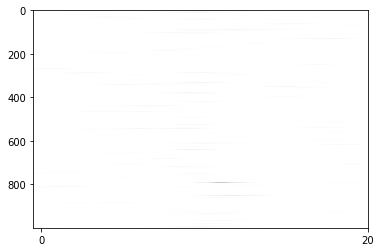

In [38]:
# Todo: get subset of TSS, just the ones that match/are closest to RNAseq list, then 
# Get the TSS in order of the deltaFPKM
fig, ax = plt.subplots(1,1)

fig = plt.imshow(matrix, cmap='gray_r', aspect='auto')
ax.set_xticks([0, 20])

# todo: set axis labels according to bp from TSS, instead of buckets, without changing scale

plt.show()

In [39]:
# feeding this to bbi stackup to extract a  #TSS  x #bins matrix of CTCF signal from the bigWig. 
refTSSwindow = bioframe.expand(refTSSbioframe, pad=1000)

with bbi.open(sdir + "GSM2609195_CTCF_ChIP-exo_WT-untagged_untreated_rep1_ENC1_tagDensity.bw") as f:
    
    matrix = f.stackup(refTSSwindow['chrom'], refTSSwindow['start'], refTSSwindow['end'], bins=20)


In [ ]:
print(refTSSwindow.size)
print(matrix.shape)

## Building TSS buckets for RNA-seq data, ordered by delta FPKM

To duplicate Figure Fig. 6(d), will align two figures: one representing (log) delta FPKM, and one illustrating the CTCF binding for that transcript's TSS

In [83]:
# RNA seq df Ordered by deltaFPKM
#twoDay_RNAseq_change[0:5]

# The transcriptome with a TSS column
# print(refTranscripts[0:5])

# remove weird random things
validTranscripts= refTranscripts.loc[False==( refTranscripts['seqname'].str.contains('_random'))]


# Try merging using tracking_id/gene_id to get TSS column onto RNA_seq list
twoDay_RNAseq_change_refTSS = twoDay_RNAseq_change.merge(validTranscripts, how='left', left_on='tracking_id',
                                                         right_on='gene_id')

# looking at size of merged df and how many had not match
print(twoDay_RNAseq_change_refTSS.size)
print(np.count_nonzero(twoDay_RNAseq_change_refTSS.isnull()))

# Let's see where the values are missing, maybe we can just toss em
twoDay_RNAseq_change_refTSS[twoDay_RNAseq_change_refTSS.isna().any(axis=1)][0:5]

797525
12331


,tracking_id,locus,CTCF-AID_untreated,CTCF-AID_2days,delta,chrom,start_x,end_x,seqname,source,feature,start_y,end_y,score,strand,frame,attributes,TSS_loc,gene_id
50,Gm15292,chr8:22389440-22390140,0.010000,0.469183,46.918333,chr8,22389440,22390140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,BC100530,chr16:36359467-36367656,0.070866,1.633186,23.046110,chr16,36359467,36367656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,Hist2h3c1,chr3:96042401-96043065,0.010000,0.132977,13.297667,chr3,96042401,96043065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,D730001G18Rik,chr15:74601337-74609289,0.031645,0.392147,12.392006,chr15,74601337,74609289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,Gm5868,chr5:72972877-72978789,0.018499,0.222944,12.051525,chr5,72972877,72978789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
# Going to just clean up the rows with NaN values, as it's only ~2%. 
twoDay_RNAseq_change_refTSS = twoDay_RNAseq_change_refTSS.dropna()

twoDay_RNAseq_change_refTSS.size

776226

## Heatmap time for ordered RNAseq data!

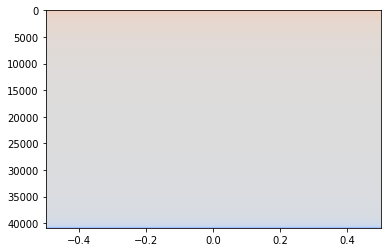

In [85]:
# log FPMK values
logFPKM = np.log(twoDay_RNAseq_change_refTSS['delta'])

logFPKM = np.transpose( np.expand_dims(logFPKM, axis=0))



plt.imshow(logFPKM, cmap='coolwarm', aspect='auto')

plt.show()

In [90]:
# make a bioframe of just the TSS from RNAseq sheet
rnaTSSbf = twoDay_RNAseq_change_refTSS[['chrom', 'TSS_loc']].copy()
rnaTSSbf = rnaTSSbf.rename(columns={'TSS_loc': 'start'})
rnaTSSbf['end'] = rnaTSSbf[['start']].copy()

rnaTSSbf = bioframe.sanitize_bedframe(rnaTSSbf)

rnaTSSwindow = bioframe.expand(rnaTSSbf, pad=1000)
print(rnaTSSwindow.size)

# chromosome X might be causing the issue, so remove https://www.ncbi.nlm.nih.gov/grc/mouse/data
rnaTSSwindow = rnaTSSwindow[rnaTSSwindow['chrom'] != 'chrX']
rnaTSSwindow = rnaTSSwindow[rnaTSSwindow['chrom'] != 'chrUn_random']

print(np.unique(rnaTSSwindow['chrom']))
print(rnaTSSwindow.size)


122562
['chr1' 'chr10' 'chr11' 'chr12' 'chr13' 'chr14' 'chr15' 'chr16' 'chr17'
 'chr18' 'chr19' 'chr2' 'chr3' 'chr4' 'chr5' 'chr6' 'chr7' 'chr8' 'chr9'
 'chrY']
117210


In [91]:
# Build for whole thing
with bbi.open(sdir + "GSM2609195_CTCF_ChIP-exo_WT-untagged_untreated_rep1_ENC1_tagDensity.bw") as f:
    
    matrix = f.stackup(rnaTSSwindow['chrom'], rnaTSSwindow['start'], rnaTSSwindow['end'], bins=20)

ValueError: Start exceeds the chromosome length, 95272651.

In [92]:
# try with subset
smallRnaTSSwindow = rnaTSSwindow[0:100]

with bbi.open(sdir + "GSM2609195_CTCF_ChIP-exo_WT-untagged_untreated_rep1_ENC1_tagDensity.bw") as f:
    
    matrix = f.stackup(smallRnaTSSwindow['chrom'], smallRnaTSSwindow['start'], smallRnaTSSwindow['end'], bins=20)

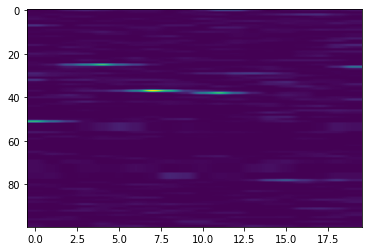

In [93]:
plt.imshow(matrix, aspect='auto')

## Try: remove cases where start exceeds chromosome length

- Not sure if this error is indicative of something else
- Resulting df is only 300 rows, seems too small
- Will try to build a graph just in case, but might be nice to revisit with an RNAseq DE dataset we made through our own pipeline, with consistent references 

In [94]:
# Removing anything outside the chromosome length
chrom_lens = pd.read_table('/scratch/pokorny/genomic_annotations/mm9.chrom.sizes', header=None, names=['chrom', 'length'])

chrom_lens[0:3]

,chrom,length
0,chr1,197195432
1,chr2,181748087
2,chr3,159599783


In [95]:
chrom_size = dict(zip(chrom_lens.chrom, chrom_lens.length))
chrom_size.get('chr1')

def removeOutOfBounds(row):
    
    if (row['start'] > chrom_size.get(row['chrom'])):
        return False
    else:
        return True


cleanRnaTSSwindow = rnaTSSwindow[rnaTSSwindow.apply(removeOutOfBounds, axis=1)]
print("Removed: "+ str(rnaTSSwindow.size - cleanRnaTSSwindow.size))

cleanRnaTSSwindow[0:5]

# Okay, this should obviously be bigger but we'll try it

Removed: 36


,chrom,start,end
0,chr11,77995615,77997615
1,chr1,94360119,94362119
2,chr11,62415588,62417588
3,chr8,73418469,73420469
4,chr4,116826179,116828179


In [96]:
with bbi.open(sdir + "GSM2609195_CTCF_ChIP-exo_WT-untagged_untreated_rep1_ENC1_tagDensity.bw") as f:
    
    matrix = f.stackup(cleanRnaTSSwindow['chrom'], cleanRnaTSSwindow['start'], cleanRnaTSSwindow['end'], bins=20)

In [103]:
print(matrix.shape)
matrix[0:5]

(39058, 20)


array([[  0.        ,   6.3499999 ,  36.34300108,  57.95      ,
         37.36200027,  17.02700081,  21.09100056,  21.59900074,
          3.04799995,   6.86100025,  36.3430006 , 126.58000031,
        120.98799896,  29.99000015,   0.        ,  11.42999983,
         17.2810008 ,  18.8060009 ,  15.75500021,  26.94000025],
       [  2.53999996,   1.16839998,   0.        ,   1.37159998,
          2.53999996,   0.66039999,   9.55039986,   8.73759987,
          0.        ,  14.335     ,  10.065     ,   0.        ,
          0.        ,   4.77519993,   4.36879993,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ],
       [  2.33679996,  10.15999985,   5.79119991,   1.60019998,
          2.53999996,   0.43179999,   0.        ,   0.        ,
          2.18439997,   5.07999992,  13.08730055,  17.25630089,
          0.        ,   9.9123    ,  26.04869954,  46.61279994,
         70.19940079,  73.93769966,  33.77570045,  12.42689996],
       [  9.95999992,   0.        ,  

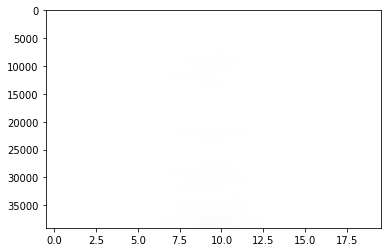

In [101]:
plt.imshow(matrix, cmap='gray_r', aspect='auto')

plt.show()

## Using only bioframe: Visualize Change of DEGs versus the distance between their TSS and neares CTCF binding site

### Getting closest TSS to regions bound by CTCF ~ another way ~

- Similar to Luppino Fig. 5(e) log2(fold change) of DEGs versus the distance between their TSS and the center of the nearest domain boundary.

- - Luppino et al appears to have used data from Rao 2017 for their analysis of gene expression. From Rao, looking at figure 7(A) Scatter plot of gene-wide PRO-seq counts in RAD21-mAC cells before (x axis) and after (y axis) treatment.

- - in Rao_2017/GSE106886_Rao-2017-RAD21notreat_vs_RAD21treat.Genes.DESeq2.txt -- this is their DEG comparison for cohesin. Can hopefully do some comparisons here :) 


- Here, comparing DEGs at day 2 of auxin-induced CTCF degradation compared to distance 

In [49]:
# Extracting locus, but keeping within the DF so that I can search by locus later
twoDay_RNAseq_change[['chrom', 'start', 'end']] = twoDay_RNAseq_change.apply(lambda row: parseLocus(row['locus']), axis=1, result_type='expand')

In [50]:
# mapping to RNA_seq data to TSS
## Note: this got rid of sorting, so will just have to re-sort again later 
closest_RNAseq_TSS = bioframe.closest(RNA_seq_bf, refTSSbioframe, suffixes=('_RNA','_TSS')).dropna()

closest_RNAseq_TSS = closest_RNAseq_TSS[['chrom_TSS', 'start_TSS', 'end_TSS']]

# rename to be bioframe-compatible
closest_RNAseq_TSS.columns = ['chrom', 'start', 'end']

print(RNA_seq_bf.size)
print(closest_RNAseq_TSS.size)
closest_RNAseq_TSS[0:5]

72945
72759


,chrom,start,end
0,chr1,94361119,94361119
1,chr1,36405603,36405603
2,chr1,173769828,173769828
3,chr1,97613095,97613095
4,chr1,176181107,176181107


In [51]:
# Getting distance between TSS above to the closest CTCF bound

# Using ctcf peaks
closest_ctcf = bioframe.closest(wt_auxin2days, closest_RNAseq_TSS, k=1, suffixes=('_ctcf','_tss'))

print(wt_auxin2days.size)
print(closest_RNAseq_TSS_window.size)
print(closest_ctcf.size)
closest_ctcf[:-5]

708864
72759
1181440


,chrom_ctcf,start_ctcf,end_ctcf,name_ctcf,score_ctcf,strand_ctcf,chrom_tss,start_tss,end_tss,distance
0,chr1,3002702,3002902,NaN,NaN,NaN,chr1,3661579,3661579,658677
1,chr1,3053590,3053790,NaN,NaN,NaN,chr1,3661579,3661579,607789
2,chr1,3107612,3107812,NaN,NaN,NaN,chr1,3661579,3661579,553767
3,chr1,3278540,3278740,NaN,NaN,NaN,chr1,3661579,3661579,382839
4,chr1,3315378,3315578,NaN,NaN,NaN,chr1,3661579,3661579,346001
...,...,...,...,...,...,...,...,...,...,...
118134,chrY,2889679,2889879,NaN,NaN,NaN,chrY,2188492,2188492,701187
118135,chrY,2889971,2890171,NaN,NaN,NaN,chrY,2188492,2188492,701479
118136,chrY,2890703,2890903,NaN,NaN,NaN,chrY,2188492,2188492,702211
118137,chrY,2891030,2891230,NaN,NaN,NaN,chrY,2188492,2188492,702538


In [52]:
# Assigning TSS back to list of RNA_seq data, so that we can query by TSS

# new_df = pd.merge(A_df, B_df,  how='left', left_on=['A_c1','c2'], right_on = ['B_c1','c2'])

twoDay_RNAseq_change_TSSant = pd.merge(twoDay_RNAseq_change, closest_RNAseq_TSS_full, how='left', 
                                       left_on=['chrom', 'start', 'end'], 
                                       right_on=['chrom_RNA', 'start_RNA', 'end_RNA']).drop_duplicates()

twoDay_RNAseq_change_TSSant[0:5]

,tracking_id,locus,CTCF-AID_untreated,CTCF-AID_2days,delta,chrom,start,end,chrom_RNA,start_RNA,end_RNA,chrom_TSS,start_TSS,end_TSS,distance
0,Snord42b,chr11:77994436-77997086,0.01,3259.146667,325914.666667,chr11,77994436,77997086,chr11,77994436.0,77997086.0,chr11,77994848,77994848,0
4,Mir6900,chr1:94336295-94370335,0.01,1716.360000,171636.000000,chr1,94336295,94370335,chr1,94336295.0,94370335.0,chr1,94361119,94361119,0
6,Snord49b,chr11:62416378-62418308,0.01,949.356667,94935.666667,chr11,62416378,62418308,chr11,62416378.0,62418308.0,chr11,62416379,62416379,0
10,Mir7067,chr8:73418620-73421342,0.01,904.956667,90495.666667,chr8,73418620,73421342,chr8,73418620.0,73421342.0,chr8,73419755,73419755,0
13,Snord38a,chr4:116826440-116828737,0.01,801.040000,80104.000000,chr4,116826440,116828737,chr4,116826440.0,116828737.0,chr4,116828453,116828453,0


In [59]:
# Create a list of distances of CTCF to tss, and one of RNA_seq delta FPKM values indexed by the shared TSS (the one closest to each set)
## index both by TSS loc

closest_ctcf.set_index(['chrom_tss', 'start_tss', 'end_tss'])

chrom_ctcf  start_ctcf  end_ctcf  name_ctcf  \
chrom_tss start_tss end_tss                                               
chr1      3661579   3661579       chr1     3002702   3002902        NaN   
                    3661579       chr1     3053590   3053790        NaN   
                    3661579       chr1     3107612   3107812        NaN   
                    3661579       chr1     3278540   3278740        NaN   
                    3661579       chr1     3315378   3315578        NaN   
...                                ...         ...       ...        ...   
chrY      2188492   2188492       chrY     2893225   2893425        NaN   
                    2188492       chrY     2893642   2893842        NaN   
                    2188492       chrY     2894236   2894436        NaN   
                    2188492       chrY     2895162   2895362        NaN   
                    2188492       chrY     2895746   2895946        NaN   

                             score_ctcf  strand_ctcf  distance  
chrom_tss start_tss end_tss                                     
chr1      3661579   3661579         NaN          NaN    658677  
                    3661579         NaN          NaN    607789  
                    3661579         NaN          NaN    553767  
                    3661579         NaN          NaN    382839  
                    3661579         NaN          NaN    346001  
...                                 ...          ...       ...  
chrY      2188492   2188492         NaN          NaN    704733  
                    2188492         NaN          NaN    705150  
                    2188492         NaN          NaN    705744  
                    2188492         NaN          NaN    706670  
                    2188492         NaN          NaN    707254  

[118144 rows x 7 columns]

In [60]:
# try using bioframe.cluster instead ? 
group_ctcf_by_tss = bioframe.cluster(closest_ctcf, cols=['chrom_tss', 'start_tss','end_tss'])
group_ctcf_by_tss.loc[group_ctcf_by_tss['cluster']==0]

# assign cluster_id to twoDay_RNAseq_change_TSSant

,chrom_ctcf,start_ctcf,end_ctcf,name_ctcf,score_ctcf,strand_ctcf,chrom_tss,start_tss,end_tss,distance,cluster,cluster_start,cluster_end
0,chr1,3002702,3002902,NaN,NaN,NaN,chr1,3661579,3661579,658677,0,3661579,3661579
1,chr1,3053590,3053790,NaN,NaN,NaN,chr1,3661579,3661579,607789,0,3661579,3661579
2,chr1,3107612,3107812,NaN,NaN,NaN,chr1,3661579,3661579,553767,0,3661579,3661579
3,chr1,3278540,3278740,NaN,NaN,NaN,chr1,3661579,3661579,382839,0,3661579,3661579
4,chr1,3315378,3315578,NaN,NaN,NaN,chr1,3661579,3661579,346001,0,3661579,3661579
5,chr1,3347532,3347732,NaN,NaN,NaN,chr1,3661579,3661579,313847,0,3661579,3661579
6,chr1,3438297,3438497,NaN,NaN,NaN,chr1,3661579,3661579,223082,0,3661579,3661579
7,chr1,3498604,3498804,NaN,NaN,NaN,chr1,3661579,3661579,162775,0,3661579,3661579
8,chr1,3519562,3519762,NaN,NaN,NaN,chr1,3661579,3661579,141817,0,3661579,3661579
9,chr1,3530904,3531104,NaN,NaN,NaN,chr1,3661579,3661579,130475,0,3661579,3661579


In [61]:
# For entry in twoDay_RNAseq_change_TSSant, search closest_ctcf by [chrom_TSS, start_TSS, end_TSS] 
## and plot closest_ctcf['distance'] against twoDay_RNAseq_change_TSSant['delta']

avgDist = group_ctcf_by_tss.groupby(['cluster', 'chrom_tss', 'start_tss', 'end_tss'])['distance'].mean().reset_index()

# Re-naming so can do inner join
avgDist = avgDist.rename(columns={'chrom_tss': 'chrom_TSS', 'start_tss': 'start_TSS', 'end_tss': 'end_TSS', 'distance': 'avg_ctcf_distance'})

avgDist[0:5]

,cluster,chrom_TSS,start_TSS,end_TSS,avg_ctcf_distance
0,0,chr1,3661579,3661579,264372.8
1,1,chr1,4350384,4350384,97152.0625
2,2,chr1,4487435,4487435,49133.5
3,3,chr1,4775807,4775807,55465.5
4,4,chr1,4797904,4797904,18061.0


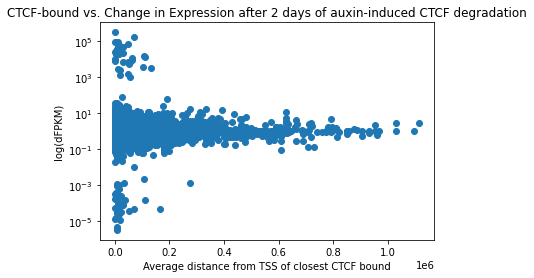

<Figure size 432x288 with 0 Axes>

In [62]:
# View differential expression of constructs (maybe try along one chromosome) and graph against same scale with CTCF binding locations
# Merge on tss location, graph average_ctcf_binding_distance vs delta in expression

RNA_TSS_CTCF_bound_combo = pd.merge(twoDay_RNAseq_change_TSSant.dropna(), avgDist.dropna(), how='inner', on=['chrom_TSS','start_TSS','end_TSS'])
   
    
RNA_TSS_CTCF_bound_combo[0:5]
plt.scatter(RNA_TSS_CTCF_bound_combo['avg_ctcf_distance'], RNA_TSS_CTCF_bound_combo['delta'])
plt.yscale('log')
plt.title('CTCF-bound vs. Change in Expression after 2 days of auxin-induced CTCF degradation')
plt.xlabel('Average distance from TSS of closest CTCF bound')
plt.ylabel('log(dFPKM)')

plt.show()

plt.savefig('files/images/CTCF-bound_TSS_vs_dFPKM_2_days_auxin_dCTCF.png')

# Visualization and comparison of Expression Data

- compare RNA-seq data
- compare genes upregulated vs downregulated shared between CTCF/cohesin
** for cohesin exploration: https://www.nature.com/articles/s41588-020-0647-9?proof=t probably where we can find some datasets

## View differential expression of constructs (maybe try along one chromosome) and graph against same scale with CTCF binding locations
--> maybe I can use bbi thing?

# Other stuff

Text(0, 0.5, 'Number of transcripts detected')

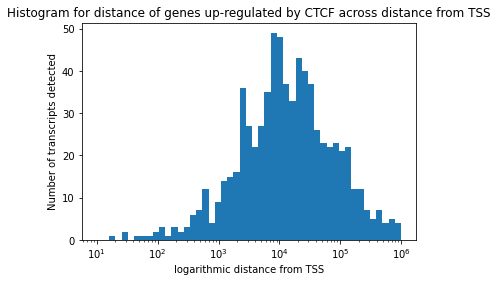

In [71]:
chr1_ctcf_data = closest_ctcf[closest_ctcf['chrom_ctcf']=='chr1']['distance']

MIN, MAX = 10.0, 1000000.0

plt.figure()
plt.hist(chr1_ctcf_data, bins = 10 ** np.linspace(np.log10(MIN), np.log10(MAX), 50))
plt.gca().set_xscale("log")
plt.title('Histogram for distance of genes up-regulated by CTCF across distance from TSS')
plt.xlabel('logarithmic distance from TSS')
plt.ylabel('Number of transcripts detected')

Text(0, 0.5, 'Number of transcripts detected')

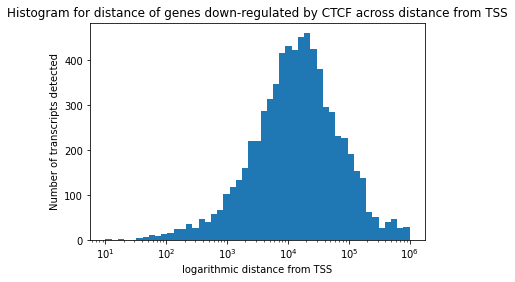

In [72]:
chr1_wt_data = closest_wt[closest_wt['chrom_wt']=='chr1']['distance']

plt.figure()
plt.hist(chr1_wt_data, bins = 10 ** np.linspace(np.log10(MIN), np.log10(MAX), 50))
plt.gca().set_xscale("log")
plt.title('Histogram for distance of genes down-regulated by CTCF across distance from TSS')
plt.xlabel('logarithmic distance from TSS')
plt.ylabel('Number of transcripts detected')

# Todo/ Up Next

* Get -cohesin RNAseq data and compare to -CTCF
* download Nora2017 in supTable 4 and extract the positions from the excel file, look at the distances between those and CTCF.
* Replicate Nora2017 Fig. 6c-d: 
** 1. Fig 6c --> need to download annotation for CTCF binding sites on top to recreate this (look into Smc1a HiChIP loop anchors "Gene misregulated upon CTCF depletion are more often found close to Smc1a HiChIP loop anchors than expected by chance. See STAR Methods for statistical details")
** 2. Fig. 6d --> need to download enhancer annotation

# For fun, attempted mapping shared vs exclusive genes per TAD regions (failed attempt)

In [ ]:
# downloaded regions from Dixon 2012, GSE35156
## note: nevermind, I think trying to load this with pandas kept crashing the kernel? The file has 120423486 rows :0

# f = '/scratch/pokorny/Dixon_2012/GSE35156_GSM862723_hESC_HindIII_HiC.nodup.summary.txt'

# boundary_regions = pd.read_table(f)
# boundary_regions[0:10]

# Questions: 
 * Does this mean that 13977 genes had gained expression by inducing CTCF-degradation? 
 ** Why? (todo: Re-read Nora to see what they had to say about these)
 * Is there a better way to display these as aggregate data?
 ** I thought maybe displaying a histogram of - vs + genes, but had trouble figuring an interval to measuring the values over (I thought TAD boundaries, but wouldn't load). 